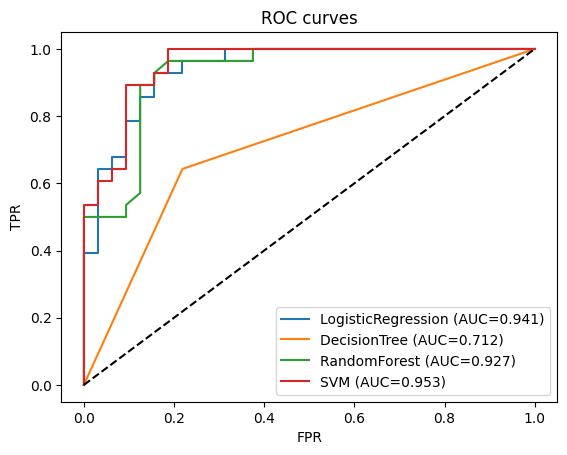

                model  accuracy  precision    recall        f1       auc
0  LogisticRegression  0.833333   0.875000  0.750000  0.807692  0.940848
1        DecisionTree  0.716667   0.720000  0.642857  0.679245  0.712054
2        RandomForest  0.816667   0.840000  0.750000  0.792453  0.927455
3                 SVM  0.866667   0.884615  0.821429  0.851852  0.953125
Saved final_model.pkl


In [1]:
# notebooks/04_supervised_learning.py
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import joblib

df = pd.read_csv(r'C:\Users\pc\Documents\Basel BME\Programming\Python\SPRINTS Heart Disease Project\python\data\heart_disease_clean.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    res = {
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba)
    }
    results.append(res)
    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={res['auc']:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC curves'); plt.legend(); plt.show()

print(pd.DataFrame(results))
# Save best model example (RandomForest)
best = RandomForestClassifier(random_state=42).fit(X_train, y_train)
joblib.dump(best, '../models/final_model.pkl')
print("Saved final_model.pkl")
